In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data/aapl_5m_train.csv')
df.drop(columns=['Unnamed: 0', 'Datetime', 'Gmtoffset', 'Volume'], inplace=True)
df['diff'] = df['Close'].diff()
df = df.dropna().reset_index(drop=True)

In [4]:
windows = [5, 10, 20, 50, 100]

for window in windows:
     covs = [None] * len(df)

     for i in range(len(df) - 2 * window + 1):
          up = df['diff'][i:i + window]
          down = df['diff'][i + window:i + 2 * window]

          cov = np.cov(up, down)[0][1]
          covs[i + 2 * window - 1] = cov
     
     df[f'cov_{window}'] = covs
     df[f'Spread_{window}'] = 2 * np.sqrt(np.abs(df[f'cov_{window}']))

bid_ask = pd.DataFrame()

for window in windows:
    bid_ask[f'Bid_{window}'] = np.where(
        df['diff'] > 0,
        df['Close'] - df[f'Spread_{window}'],
        df['Close']
    )

    bid_ask[f'Ask_{window}'] = np.where(
        df['diff'] <= 0,
        df['Close'] + df[f'Spread_{window}'],
        df['Close']
    )

bid_ask


,Bid_5,Ask_5,Bid_10,Ask_10,Bid_20,Ask_20,Bid_50,Ask_50,Bid_100,Ask_100
0,131.889999,NaN,131.889999,NaN,131.889999,NaN,131.889999,NaN,131.889999,NaN
1,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997
2,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000
3,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN
4,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN
...,...,...,...,...,...,...,...,...,...,...
39567,128.911003,129.054992,128.990683,129.054992,128.968943,129.054992,129.008188,129.054992,128.854473,129.054992
39568,129.174315,129.380004,129.351767,129.380004,129.309047,129.380004,129.332813,129.380004,129.179958,129.380004
39569,129.588059,129.764404,129.571969,129.764404,129.655864,129.764404,129.727883,129.764404,129.561978,129.764404
39570,129.773803,129.949996,129.767916,129.949996,129.871503,129.949996,129.895281,129.949996,129.746514,129.949996


Text(0, 0.5, 'Average Spread')

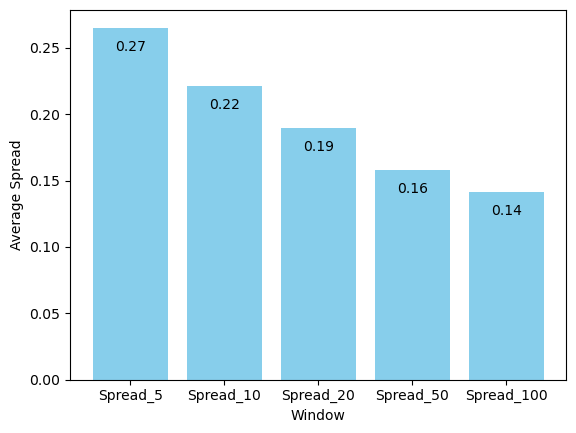

In [14]:
spread_cols = [c for c in df.columns if 'Spread' in c]
spread_means = [df[col].mean() for col in spread_cols]

plt.figure()
plt.bar(spread_cols, spread_means, color='skyblue')
for i, v in enumerate(spread_means):
    plt.text(i, v - 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.xlabel('Window')
plt.ylabel('Average Spread')